### install pandas numpy matplotlib

In [43]:

%pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


### Import pandas and read Csv

In [44]:

# TODO: Importera pandas
import pandas as pd

!pwd
%cd "../data"
# TODO: Ladda in data från CSV-fil
df = pd.read_csv('winequality-red.csv')

# TODO: Visa första 5 raderna
df.head()

# TODO: Visa antal rader och kolumner
df.shape

# TODO: Lista alla kolumner
df.columns


c:\SystemUtvecklare_utbildning\Big_data\big-data-iot-labs\data


'pwd' is not recognized as an internal or external command,
operable program or batch file.


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### plot for show data

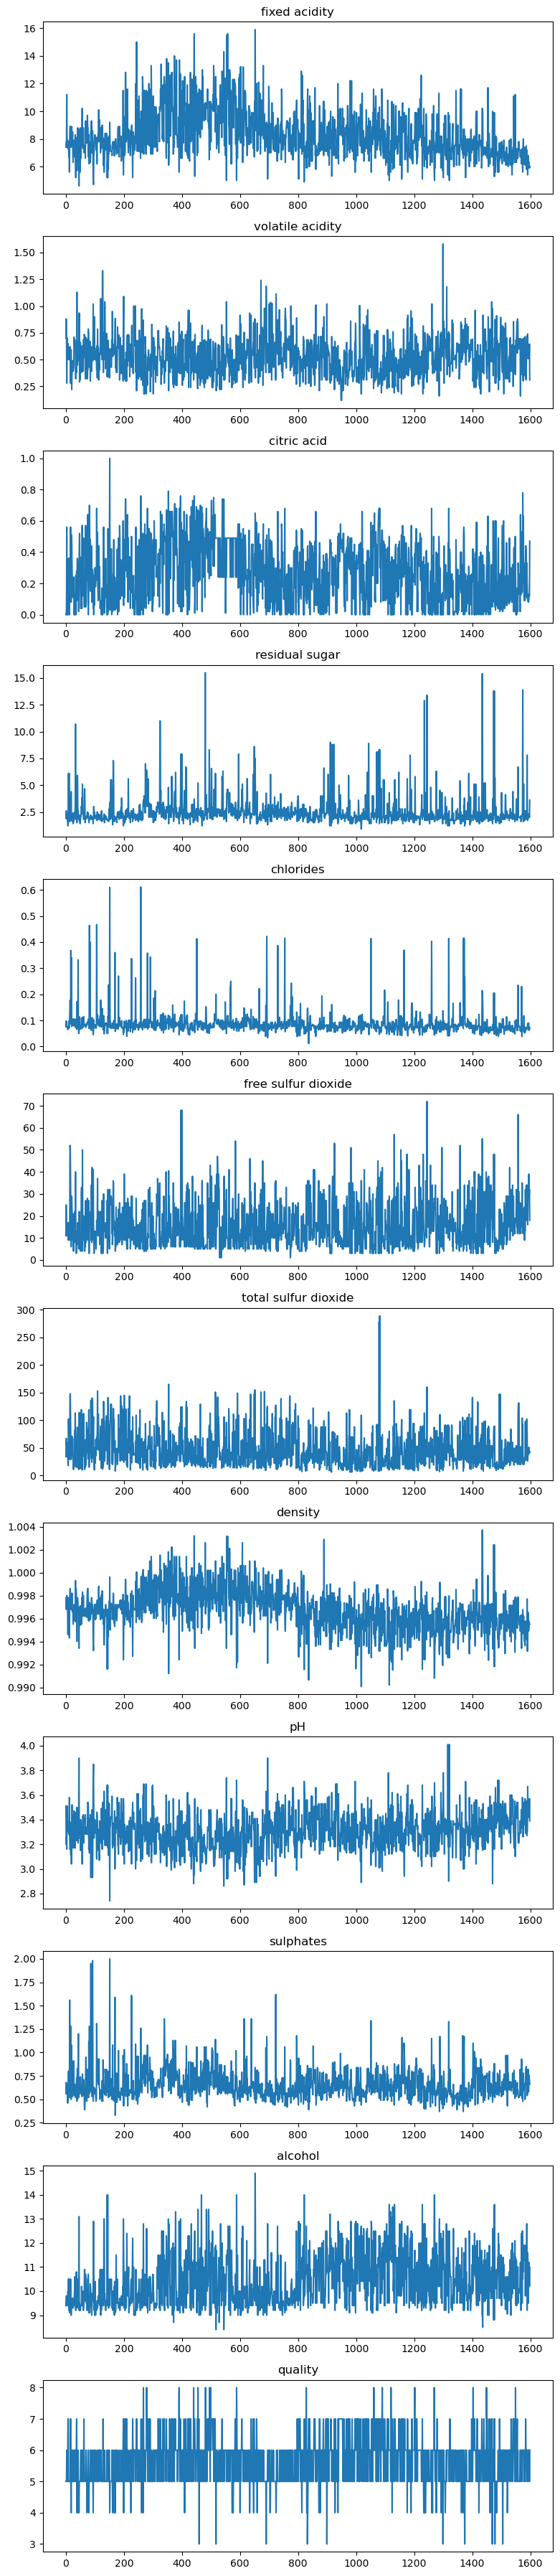

In [45]:
import matplotlib.pyplot as plt

def find_outlier_data(df, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))  # en kolumn av subplots

    for ax, col in zip(axes, columns):
        ax.plot(df[col])
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

find_outlier_data(df, df.columns)


### check nan value


In [46]:
check_nans=df.isna().sum()
print(check_nans)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Outliers


In [47]:

# TODO: Visa statistik för numeriska kolumner
#print(df.describe())

# TODO: Kolla efter outliers (extremvärden)
df_test = (df.loc[:, df.columns != 'quality']).copy()
# print(f"total rows: {len(df)}")

# print(df_test.loc[:, df_test.columns != 'quality'])
for col in df_test.columns:
    Q1 = df_test[f"{col}"].quantile(0.25)
    Q3 = df_test[f"{col}"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #print(f"col: {col} --- IQR: {IQR} --- low: {lower_bound} --- high: {upper_bound}")

    outlier = df_test[(df_test[f"{col}"] > lower_bound) | (df_test[f"{col}"] < upper_bound)]
    # print("Outliers:\n")
print(outlier.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


### Check dublicateds and drop duplicateds


In [48]:
# TODO: Kolla efter duplikate
dups=df.duplicated()
print(dups)

df=df.drop_duplicates()

dropted_dups=df.duplicated()
print(dropted_dups)




0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool
0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Length: 1359, dtype: bool


### Show data with bar chart

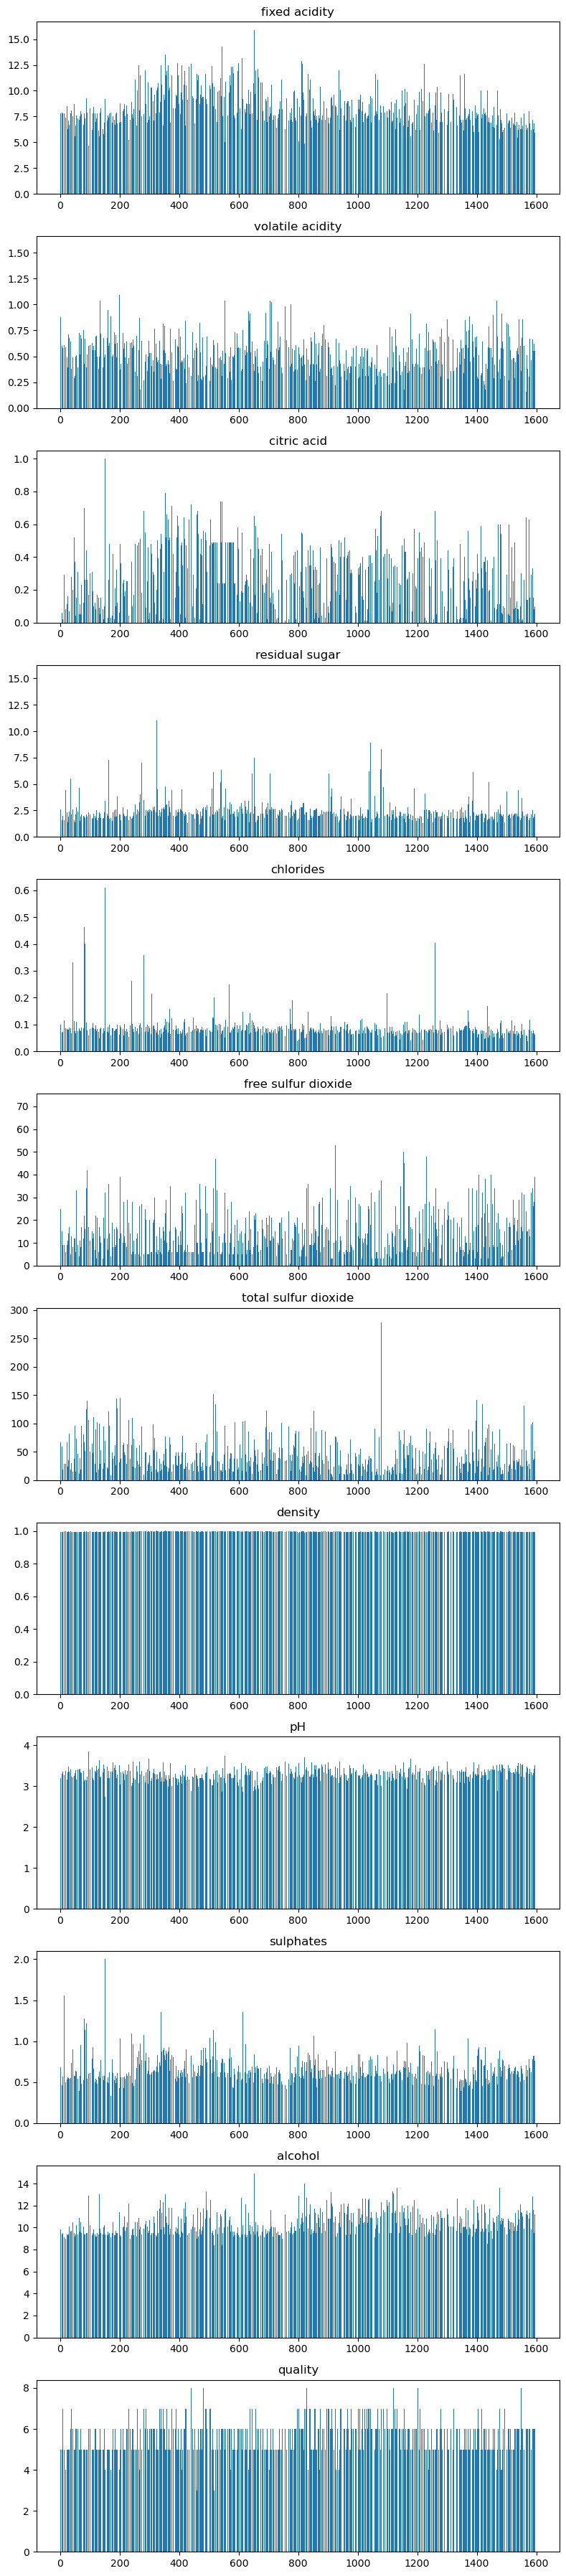

In [49]:
import matplotlib.pyplot as plt

def bar_subplots(dataFrame, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))

    for ax, col in zip(axes, columns):
        ax.bar(dataFrame.index, dataFrame[col])
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

bar_subplots(df, df.columns)


### show data with histogram chart


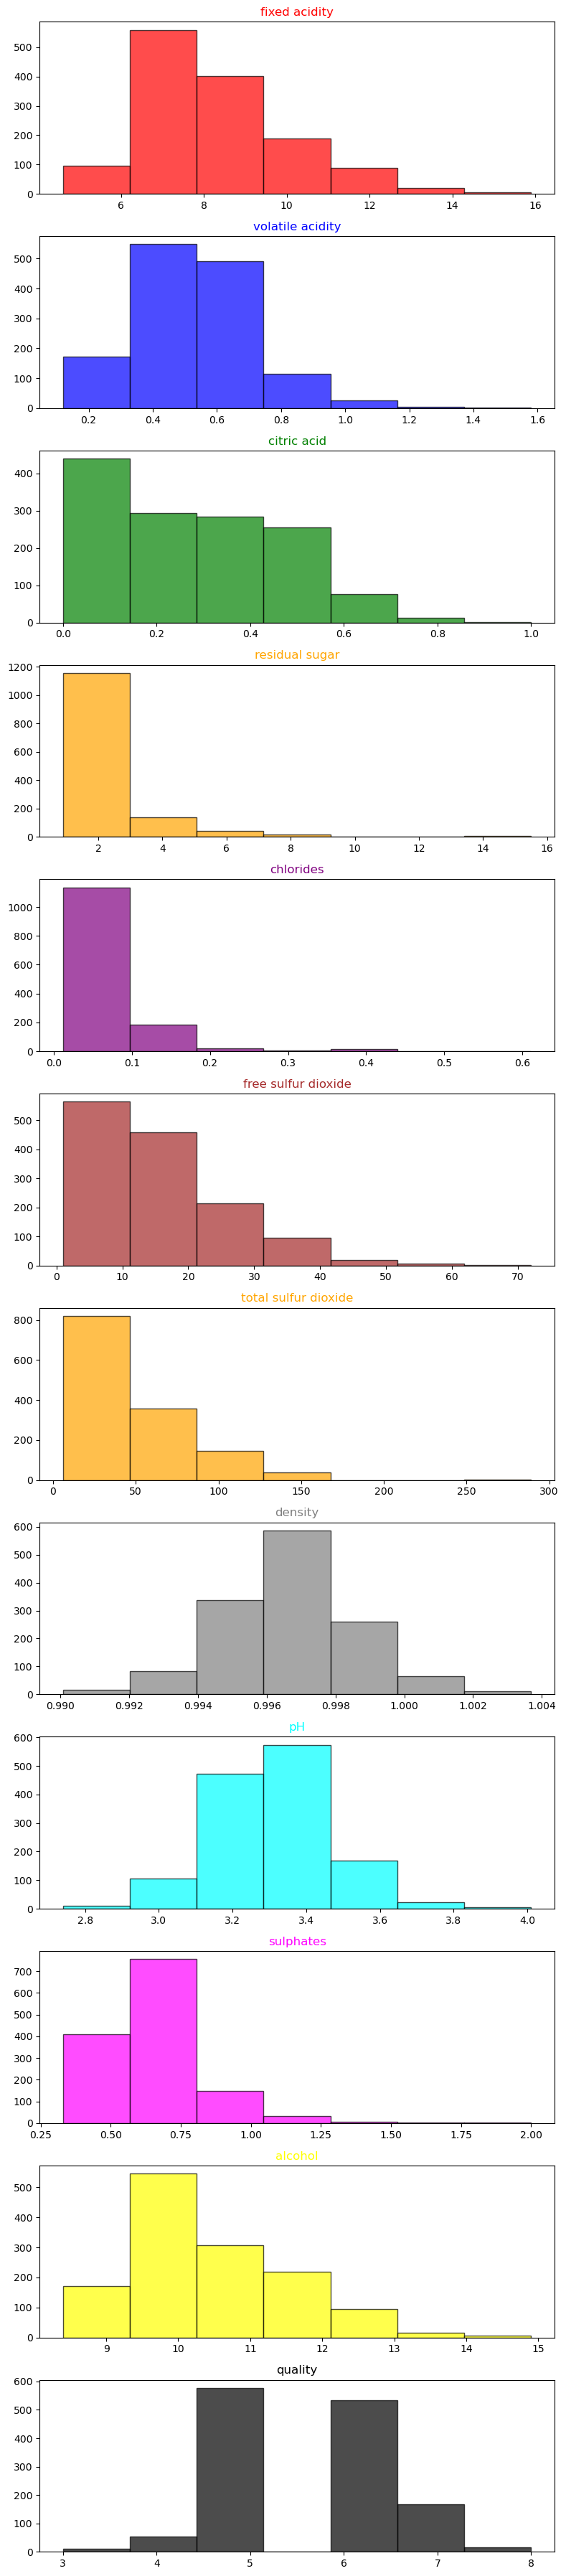

In [50]:
import matplotlib.pyplot as plt

def hist_subplots(df, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))
    colors = ['red','blue','green','orange','purple','brown','orange','gray','cyan','magenta','yellow','black']
    for ax, col,color in zip(axes, columns,colors):
        ax.hist(df[col],bins=7, edgecolor='black', color=color, alpha=0.7)
        ax.set_title(col,color=color)

    plt.tight_layout()
    plt.show()

hist_subplots(df, df.columns)


### Good quality wine data graphs

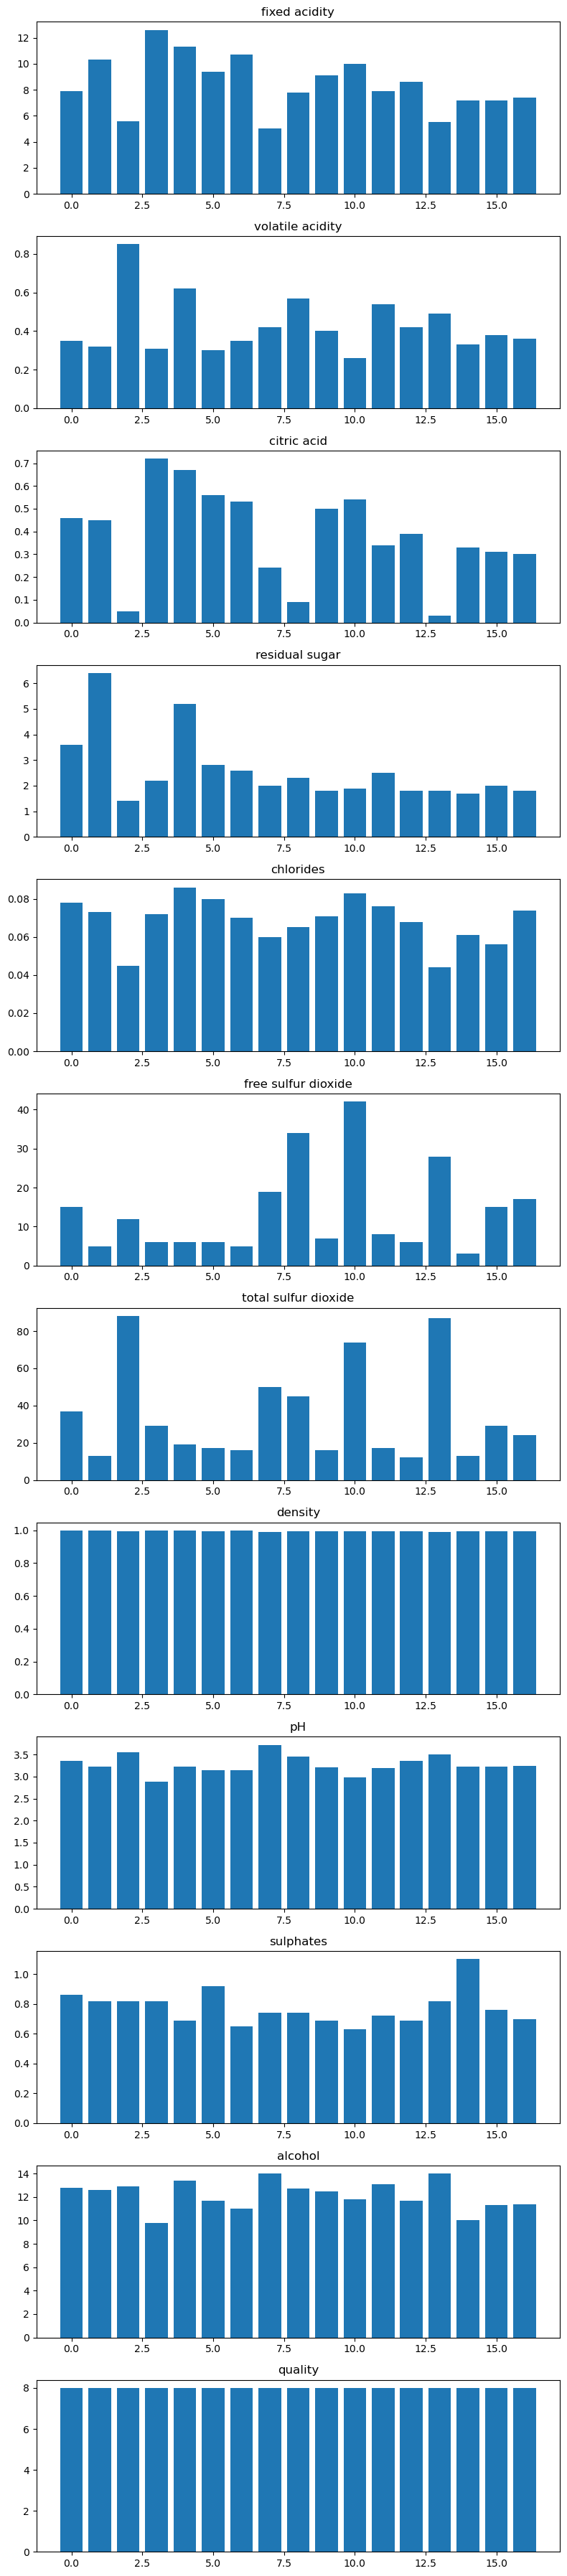

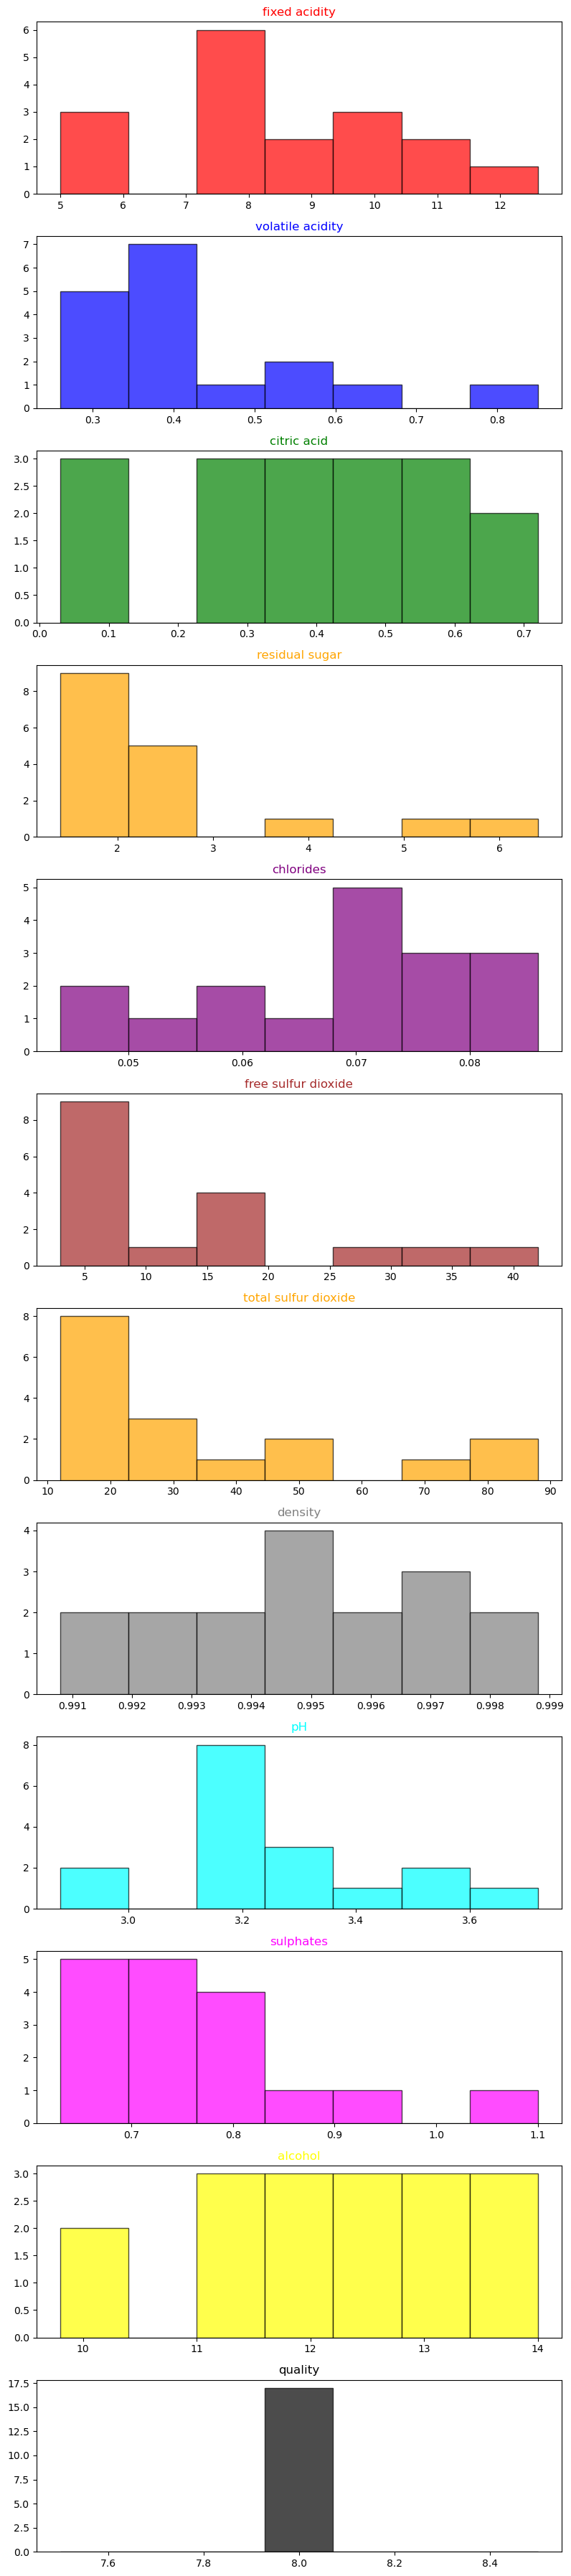

In [51]:
good_quality_wine = df[(df['quality'] >= 7.5)]
good_quality_wine.reset_index(drop=True, inplace=True)

bar_subplots(good_quality_wine, good_quality_wine.columns)
hist_subplots(good_quality_wine, good_quality_wine.columns)


In [52]:
%pip install scikit-learn

print("✅ scikit-learn installerad!")

✅ scikit-learn installerad!



In [53]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc,
    precision_recall_curve
)

from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print(" Bibliotek importerade!")
print("Vi använder sklearn - världens enklaste ML-bibliotek")

 Bibliotek importerade!
Vi använder sklearn - världens enklaste ML-bibliotek


In [54]:

print(" DATA LADDAD")
print("=" * 60)
print(f"Antal rader: {len(df):,}")
print(f"Antal kolumner: {len(df.columns)}")
print(f"\nFörsta 3 rader:")
print(df.head(3))

 DATA LADDAD
Antal rader: 1,359
Antal kolumner: 12

Första 3 rader:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  


In [55]:

print(" VÄLJ DATA FÖR MODELLEN")
print("=" * 60)

# TARGET (vad vi vill förutsäga)
Y = df['quality']
print(f" Target (Y): quality")
print(f"   → Detta ska modellen lära sig förutsäga\n")

X = df.loc[:, df.columns != 'quality']

print(f"\n Data shape:")
print(f"   X: {X.shape} (rader, kolumner)")
print(f"   Y: {Y.shape} (rader)")

 VÄLJ DATA FÖR MODELLEN
 Target (Y): quality
   → Detta ska modellen lära sig förutsäga


 Data shape:
   X: (1359, 11) (rader, kolumner)
   Y: (1359,) (rader)


In [56]:

print("\n DELA DATA: TRÄNING vs TEST")
print("=" * 60)

# 80% träning, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(f" Data uppdelad:")
print(f"   Träningsdata: {len(X_train):,} rader (80%)")
print(f"   Testdata: {len(X_test):,} rader (20%)")


 DELA DATA: TRÄNING vs TEST
 Data uppdelad:
   Träningsdata: 1,087 rader (80%)
   Testdata: 272 rader (20%)


In [57]:

print("\n BYGG MODELLEN")
print("=" * 60)

# Skapa modellen (1 rad kod!)
modell = LinearRegression()
print(" Modell skapad: Linear Regression")

# Träna modellen (1 rad kod!)
print("\n Tränar modellen...")
modell.fit(X_train, Y_train)
print(" Träning klar!")


 BYGG MODELLEN
 Modell skapad: Linear Regression

 Tränar modellen...
 Träning klar!


### Classifing

In [58]:
# Skapa en kategori:
# 1 = hög temperatur
# 0 = låg temperatur
# df["Good_quality"] = (df["quality"] > 6.5).astype(float)

# print(df[["quality", "Good_quality"]].head(20))

In [72]:
df.columns


df2 = df.loc[:,df.columns != 'quality']

x_clf =df2[df2.columns]
y_clf = df[['quality']]

X_train, X_test, Y_train, Y_test = train_test_split(
    x_clf, y_clf, test_size=0.2, random_state=42)


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_clf.fit(X_train, Y_train)

y_pred_rf_clf = rf_clf.predict(X_test)

print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(Y_test, y_pred_rf_clf))
precision = precision_score(y_true=Y_test, y_pred=y_pred_rf_clf,average='micro')
recall = recall_score(y_true=Y_test, y_pred=y_pred_rf_clf, average='micro')

print("\nRandom Forest Regression")
print("R2:", r2_score(Y_test, y_pred_rf_clf))
print("Precision:", precision)
print("Recall:", recall)

c:\Users\mahdi\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Classifier
Accuracy: 0.6470588235294118

Random Forest Regression
R2: 0.28375980307974136
Precision: 0.6470588235294118
Recall: 0.6470588235294118


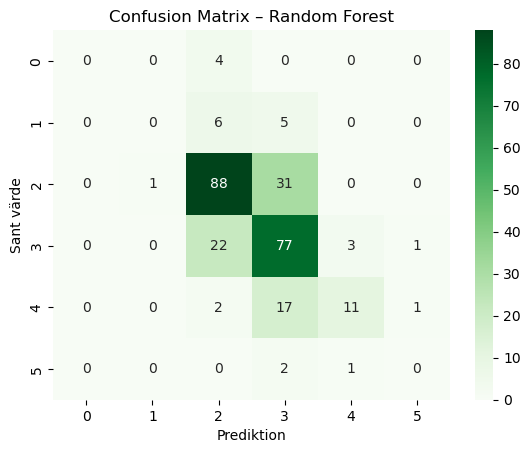

In [70]:
cm_rf = confusion_matrix(Y_test, y_pred_rf_clf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Prediktion")
plt.ylabel("Sant värde")
plt.show()

In [73]:
importances = rf_clf.feature_importances_
features = x_clf.columns

df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(df.sort_values('Importance', ascending=False))

                 Feature  Importance
10               alcohol    0.146268
9              sulphates    0.106908
6   total sulfur dioxide    0.102942
1       volatile acidity    0.101401
7                density    0.091267
4              chlorides    0.083908
0          fixed acidity    0.075907
8                     pH    0.073892
3         residual sugar    0.073789
2            citric acid    0.073455
5    free sulfur dioxide    0.070263


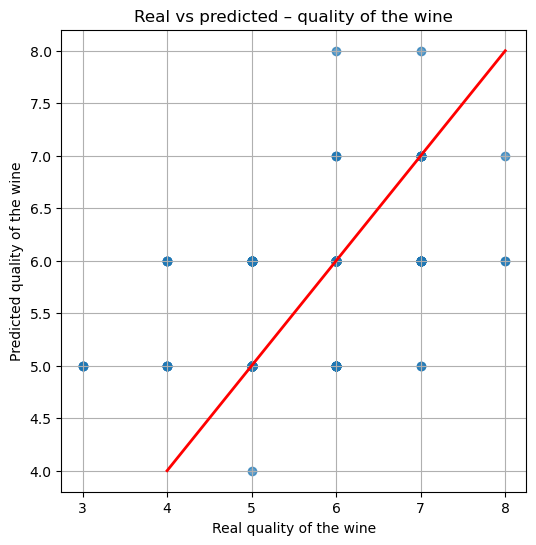

In [74]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred_rf_clf, alpha=0.7)

plt.xlabel("Real quality of the wine")
plt.ylabel("Predicted quality of the wine")
plt.title("Real vs predicted – quality of the wine")

# rita en linje som visar 'perfekta' prediktioner
min_val = min(y_pred_rf_clf.min(), y_pred_rf_clf.min())
max_val = max(y_pred_rf_clf.max(), y_pred_rf_clf.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

plt.grid(True)
plt.show()